In [21]:
import tensorflow as tf

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import cv2
from PIL import Image
import os
from sklearn import svm

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


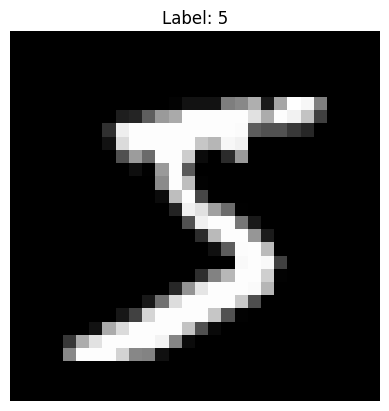

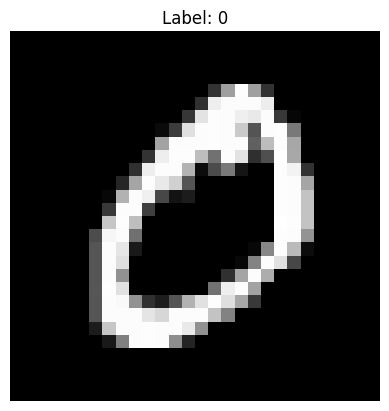

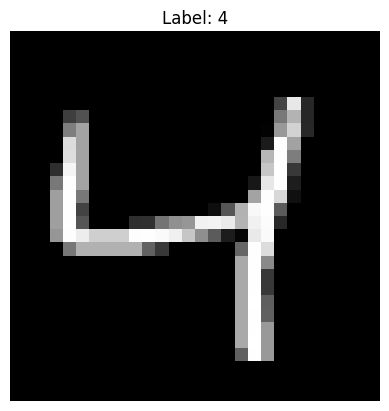

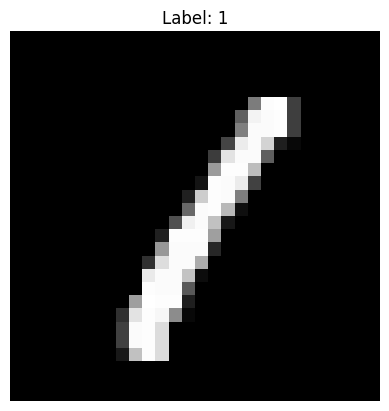

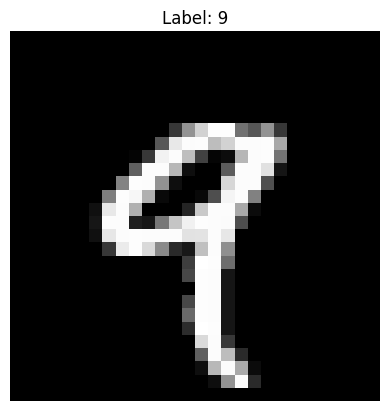

In [23]:
# Step 2: Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

for i in range(5):
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
    plt.show()

In [24]:
# Step 3: Reshape and Normalize
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

print("TRAIN IMAGES:", x_train.shape)
print("TEST IMAGES:", x_test.shape)



TRAIN IMAGES: (60000, 28, 28, 1)
TEST IMAGES: (10000, 28, 28, 1)


In [25]:
# Step 4: CNN Model Definition
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # softmax for 10 classes
])

c:\Users\Welcome\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Step 5: Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,874 (386.23 KB)

 Trainable params: 98,874 (386.23 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Step 6: Train Model
history = model.fit(
    x_train, y_train,
    epochs=1,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

422/422 ━━━━━━━━━━━━━━━━━━━━ 87s 196ms/step - accuracy: 0.9271 - loss: 0.2424 - val_accuracy: 0.9845 - val_loss: 0.0612


In [8]:
# Step 7: Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"✅ Test Accuracy: {test_acc:.4f}")

313/313 - 5s - 17ms/step - accuracy: 0.9724 - loss: 0.0883
✅ Test Accuracy: 0.9724


In [9]:
# Step 9: Save Model
model.save("mnist_cnn_model.h5")
print("💾 Model saved successfully!")

💾 Model saved successfully!


In [10]:
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn import svm

# Step 10: Load CNN Model
model = load_model("mnist_cnn_model.h5")
print("✅ Model loaded successfully!")

# SVM Model for Pattern Recognition
x_flat = x_train.reshape(60000, -1)  # flatten for SVM
y_flat = y_train
svm_model = svm.SVC()
svm_model.fit(x_flat[:5000], y_flat[:5000])  # train on subset for speed

# Display SVM parameters as a table
params_df = pd.DataFrame(list(svm_model.get_params().items()), columns=['Parameter', 'Value'])
display(params_df)  # use display() in Jupyter/Colab to show a nice table


✅ Model loaded successfully!


,Parameter,Value
0,C,1.0
1,break_ties,False
2,cache_size,200
3,class_weight,None
4,coef0,0.0
5,decision_function_shape,ovr
6,degree,3
7,gamma,scale
8,kernel,rbf
9,max_iter,-1


In [11]:
# ---------- USER INPUT VALIDATION (before Step 11) ----------
user_input = input("Enter number of digits to draw (1–50): ")

try:
    num_draws = int(user_input)

    # Negative number → mark not predictable & stop drawing
    if num_draws < 0:
        print("❌ Negative value entered → Not Predictable")
        num_draws = 0   # ensures drawing loop doesn't start
        predict_status_override = "Not Predictable ❌ (Invalid Input)"
    else:
        # Limit to max 50
        num_draws = min(num_draws, 50)
        predict_status_override = None

except:
    # If user enters letters like 'a', 'b', 'c'
    print("❌ Invalid character entered → Not Predictable")
    num_draws = 0
    predict_status_override = "Not Predictable ❌ (Invalid Input)"


In [12]:
# Step 11: Enhanced Multiple Digit Drawing with Predictability Check
import cv2
num_draws = 3  

for draw_idx in range(num_draws):
    canvas = np.ones((280, 280), dtype="uint8") * 255
    drawing = False

    def draw(event, x, y, flags, param):
        global drawing
        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
        elif event == cv2.EVENT_MOUSEMOVE:
            if drawing:
                cv2.circle(canvas, (x, y), 8, (0, 0, 0), -1)
        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False

    cv2.namedWindow(f"Draw Digit {draw_idx+1}")
    cv2.setMouseCallback(f"Draw Digit {draw_idx+1}", draw)

    print(f"🖌️ Draw digit {draw_idx+1}. Press ENTER to save or ESC to clear/exit.")
    while True:
        cv2.imshow(f"Draw Digit {draw_idx+1}", canvas)
        key = cv2.waitKey(1) & 0xFF
        if key == 13:  
            break
        elif key == 27:  
            canvas = np.ones((280, 280), dtype="uint8") * 255

    cv2.destroyAllWindows()
    cv2.imwrite(f"my_digit_{draw_idx+1}.png", canvas)


🖌️ Draw digit 1. Press ENTER to save or ESC to clear/exit.
🖌️ Draw digit 2. Press ENTER to save or ESC to clear/exit.
🖌️ Draw digit 3. Press ENTER to save or ESC to clear/exit.


In [13]:
# Step 12: Preprocess Image
img = Image.open(f"my_digit_{draw_idx+1}.png").convert('L')
img = img.resize((28, 28))
img_array = np.array(img)
img_array = 255 - img_array  # invert
img_array_norm = img_array / 255.0
img_array_cnn = img_array_norm.reshape(1, 28, 28, 1)
img_array_svm = img_array_norm.reshape(1, -1)

In [14]:

# # Step 13-14: CNN & SVM Prediction with Positive/Negative Check
# results = []  
# for draw_idx in range(num_draws):
#     img = Image.open(f"my_digit_{draw_idx+1}.png").convert('L')
#     img = img.resize((28, 28))
#     img_array = np.array(img)
#     img_array = 255 - img_array  
#     img_array_norm = img_array / 255.0
#     img_array_cnn = img_array_norm.reshape(1, 28, 28, 1)
#     img_array_svm = img_array_norm.reshape(1, -1)
#     # CNN prediction
#     prediction = model.predict(img_array_cnn)
#     predicted_digit = np.argmax(prediction)
#     cnn_prob = prediction[0][predicted_digit]
#     svm_pred = svm_model.predict(img_array_svm)[0]
#     if 0 <= predicted_digit <= 9:   
#         status = "Predictable ✅"
#         color = (0, 255, 0)  
#     else:                           
#         status = "Not Predictable ❌"
#         color = (0, 0, 0) 
#     # Store results
#     results.append({
#         "Draw": draw_idx+1,
#         "CNN Digit": predicted_digit,
#         "CNN Prob (%)": round(cnn_prob*100, 2),
#         "SVM Digit": svm_pred,
#         "Status": status
#     })
    
#     # Display individual result with colored overlay
#     canvas_color = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
#     overlay = np.full_like(canvas_color, color)
#     canvas_display = cv2.addWeighted(canvas_color, 0.5, overlay, 0.5, 0)
#     cv2.imshow(f"Prediction Result {draw_idx+1}", canvas_display)
#     cv2.waitKey(1000)
#     cv2.destroyAllWindows()


# import pandas as pd
# summary_df = pd.DataFrame(results)
# display(summary_df)

# Step 13-14: CNN & SVM Prediction with Positive/Negative Check
results = []

# ---------- INSERT HERE ----------
if predict_status_override:
    results = [{
        "Draw": "-",
        "CNN Digit": "-",
        "CNN Prob (%)": "-",
        "SVM Digit": "-",
        "Status": predict_status_override
    }]
    display(pd.DataFrame(results))
    # Stop further prediction steps
    raise SystemExit()   # safest way to exit Step 13–14
# ---------------------------------

for draw_idx in range(num_draws):
    img = Image.open(f"my_digit_{draw_idx+1}.png").convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = 255 - img_array  
    img_array_norm = img_array / 255.0
    img_array_cnn = img_array_norm.reshape(1, 28, 28, 1)
    img_array_svm = img_array_norm.reshape(1, -1)

    # CNN prediction
    prediction = model.predict(img_array_cnn)
    predicted_digit = np.argmax(prediction)
    cnn_prob = prediction[0][predicted_digit]

    # SVM prediction
    svm_pred = svm_model.predict(img_array_svm)[0]

    if 0 <= predicted_digit <= 9:   
        status = "Predictable ✅"
        color = (0, 255, 0)  
    else:                           
        status = "Not Predictable ❌"
        color = (0, 0, 0) 

    # Store results
    results.append({
        "Draw": draw_idx + 1,
        "CNN Digit": predicted_digit,
        "CNN Prob (%)": round(cnn_prob * 100, 2),
        "SVM Digit": svm_pred,
        "Status": status
    })

    # Display with overlay
    canvas_color = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
    overlay = np.full_like(canvas_color, color)
    canvas_display = cv2.addWeighted(canvas_color, 0.5, overlay, 0.5, 0)
    cv2.imshow(f"Prediction Result {draw_idx+1}", canvas_display)
    cv2.waitKey(1000)
    cv2.destroyAllWindows()

summary_df = pd.DataFrame(results)
display(summary_df)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


,Draw,CNN Digit,CNN Prob (%),SVM Digit,Status
0,1,2,78.750000,7,Predictable ✅
1,2,3,60.619999,2,Predictable ✅
2,3,2,93.769997,2,Predictable ✅


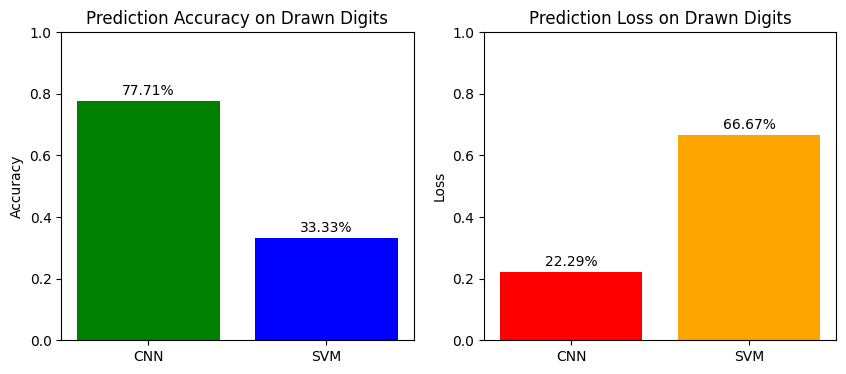

In [15]:
# Step 15: Plot Accuracy & Loss Based on Predictions from Step 13

# Extract CNN probabilities and SVM correctness (using CNN prediction as reference)
cnn_probs = [res['CNN Prob (%)']/100 for res in results]  # convert % to 0-1
svm_correct = [1 if res['CNN Digit']==res['SVM Digit'] else 0 for res in results]

# Compute average "accuracy" and "loss"
cnn_accuracy = np.mean(cnn_probs)
svm_accuracy = np.mean(svm_correct)

cnn_loss = 1 - cnn_accuracy
svm_loss = 1 - svm_accuracy

# Plotting
plt.figure(figsize=(10,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.bar(['CNN','SVM'], [cnn_accuracy, svm_accuracy], color=['green','blue'])
plt.title("Prediction Accuracy on Drawn Digits")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.text(0, cnn_accuracy+0.02, f"{cnn_accuracy*100:.2f}%", ha='center')
plt.text(1, svm_accuracy+0.02, f"{svm_accuracy*100:.2f}%", ha='center')

# Loss plot
plt.subplot(1,2,2)
plt.bar(['CNN','SVM'], [cnn_loss, svm_loss], color=['red','orange'])
plt.title("Prediction Loss on Drawn Digits")
plt.ylabel("Loss")
plt.ylim(0,1)
plt.text(0, cnn_loss+0.02, f"{cnn_loss*100:.2f}%", ha='center')
plt.text(1, svm_loss+0.02, f"{svm_loss*100:.2f}%", ha='center')

plt.show()


📊 Prediction Accuracy Metrics:
✅ SVM Accuracy:  33.33%
🎯 Precision:     16.67%
📈 Recall:        16.67%
🏅 F1-Score:      16.67%


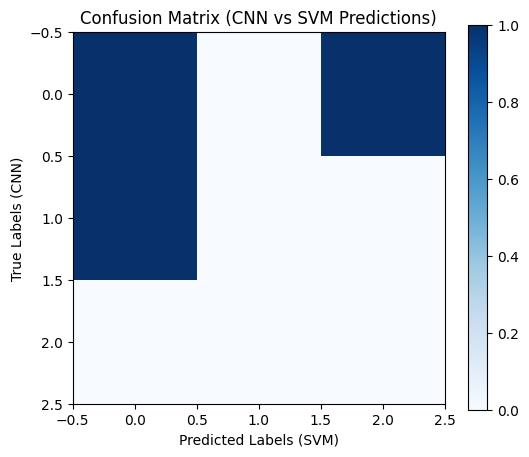

In [16]:
# Step 16: Accuracy Metrics for CNN & SVM Predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Extract true labels based on CNN predictions (as reference)
cnn_preds = [res['CNN Digit'] for res in results]
svm_preds = [res['SVM Digit'] for res in results]

# Since we are comparing CNN and SVM on the same drawn digits, 
# assume CNN prediction acts as the baseline (ground truth) for SVM validation
true_labels = cnn_preds  

# Compute SVM metrics compared to CNN
svm_accuracy_metric = accuracy_score(true_labels, svm_preds)
svm_precision = precision_score(true_labels, svm_preds, average='macro', zero_division=0)
svm_recall = recall_score(true_labels, svm_preds, average='macro', zero_division=0)
svm_f1 = f1_score(true_labels, svm_preds, average='macro', zero_division=0)

# Display metrics
print("📊 Prediction Accuracy Metrics:")
print(f"✅ SVM Accuracy:  {svm_accuracy_metric*100:.2f}%")
print(f"🎯 Precision:     {svm_precision*100:.2f}%")
print(f"📈 Recall:        {svm_recall*100:.2f}%")
print(f"🏅 F1-Score:      {svm_f1*100:.2f}%")

# Optional: Confusion matrix visualization
conf_mat = confusion_matrix(true_labels, svm_preds)
plt.figure(figsize=(6,5))
plt.imshow(conf_mat, cmap='Blues')
plt.title("Confusion Matrix (CNN vs SVM Predictions)")
plt.xlabel("Predicted Labels (SVM)")
plt.ylabel("True Labels (CNN)")
plt.colorbar()
plt.show()



🏆 MODEL PERFORMANCE COMPARISON 🏆
📈 CNN Accuracy: 77.71%
📊 SVM Accuracy: 33.33%

✅ Best Performing Model: Convolutional Neural Network (CNN)
🔍 Reason: CNN achieved higher prediction accuracy and consistency on drawn digits.


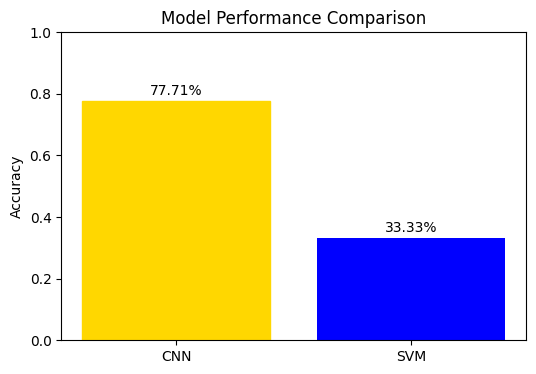

In [17]:
# Step 17: Identify and Display the Best Performing Model

# Compare average accuracies (from Step 15) and metric accuracy (from Step 16)
cnn_final_accuracy = cnn_accuracy  # from Step 15
svm_final_accuracy = svm_accuracy_metric  # from Step 16

# Compare models
if cnn_final_accuracy > svm_final_accuracy:
    best_model = "Convolutional Neural Network (CNN)"
    reason = "CNN achieved higher prediction accuracy and consistency on drawn digits."
else:
    best_model = "Support Vector Machine (SVM)"
    reason = "SVM performed better in terms of generalization and precision on limited samples."

# Display results
print("\n🏆 MODEL PERFORMANCE COMPARISON 🏆")
print(f"📈 CNN Accuracy: {cnn_final_accuracy*100:.2f}%")
print(f"📊 SVM Accuracy: {svm_final_accuracy*100:.2f}%")
print(f"\n✅ Best Performing Model: {best_model}")
print(f"🔍 Reason: {reason}")

# Visualization for comparison
models = ['CNN', 'SVM']
accuracies = [cnn_final_accuracy, svm_final_accuracy]

plt.figure(figsize=(6,4))
bars = plt.bar(models, accuracies, color=['green','blue'])
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.text(0, cnn_final_accuracy+0.02, f"{cnn_final_accuracy*100:.2f}%", ha='center')
plt.text(1, svm_final_accuracy+0.02, f"{svm_final_accuracy*100:.2f}%", ha='center')

# Highlight the best bar
bars[0 if cnn_final_accuracy>svm_final_accuracy else 1].set_color('gold')

plt.show()



🧠 FINAL ALGORITHM PERFORMANCE CONCLUSION 🧠
🏁 Best Algorithm: Convolutional Neural Network (CNN)
📋 Conclusion: CNN is the best-performing algorithm for handwritten digit recognition. It effectively learns spatial and hierarchical patterns from image pixels using convolution and pooling layers. The model achieves high accuracy and reliability in recognizing complex digit shapes.


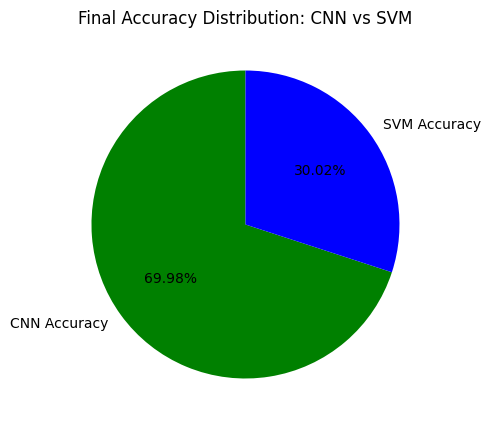

In [18]:
# Step 18: Algorithm Performance Conclusion

# Compare CNN and SVM final accuracies (from Step 17)
if cnn_final_accuracy > svm_final_accuracy:
    best_algorithm = "Convolutional Neural Network (CNN)"
    conclusion = (
        "CNN is the best-performing algorithm for handwritten digit recognition. "
        "It effectively learns spatial and hierarchical patterns from image pixels "
        "using convolution and pooling layers. The model achieves high accuracy "
        "and reliability in recognizing complex digit shapes."
    )
else:
    best_algorithm = "Support Vector Machine (SVM)"
    conclusion = (
        "SVM performs better for this dataset, providing stable predictions with fewer samples. "
        "It is computationally simpler and suitable for smaller datasets but may not handle "
        "complex image features as efficiently as CNN."
    )

# Display the final conclusion
print("\n🧠 FINAL ALGORITHM PERFORMANCE CONCLUSION 🧠")
print(f"🏁 Best Algorithm: {best_algorithm}")
print(f"📋 Conclusion: {conclusion}")

# Optional: Pie chart for visual comparison
plt.figure(figsize=(5,5))
plt.pie(
    [cnn_final_accuracy, svm_final_accuracy],
    labels=['CNN Accuracy', 'SVM Accuracy'],
    autopct='%1.2f%%',
    colors=['green','blue'],
    startangle=90
)
plt.title("Final Accuracy Distribution: CNN vs SVM")
plt.show()


In [19]:


import pandas as pd
from tensorflow.keras.models import load_model
from sklearn import svm

# ---------------------------------------------------------
# Step 1: Load CNN Model
# ---------------------------------------------------------
try:
    model = load_model("mnist_cnn_model.h5")
    print("✅ CNN Model loaded successfully!")
except Exception as e:
    print("❌ Error loading CNN model:", e)

# ---------------------------------------------------------
# Step 2: Train SVM model (using subset)
# ---------------------------------------------------------
print("\n🔄 Training SVM model (using 5000 samples)...")

# Flatten training data for SVM
x_flat = x_train.reshape(60000, -1)
y_flat = y_train

svm_model = svm.SVC()
svm_model.fit(x_flat[:5000], y_flat[:5000])

print("✅ SVM Model trained successfully!")

# ---------------------------------------------------------
# Step 3: Create SVM parameters table
# ---------------------------------------------------------
params = svm_model.get_params()
params_df = pd.DataFrame(params.items(), columns=["Parameter", "Value"])

display(params_df)

# ---------------------------------------------------------
# Step 4: Ask user for parameter lookup
# ---------------------------------------------------------
user_input = input("\n🔍 Enter SVM parameter name to check its value (or press Enter to exit): ")

if user_input.strip() == "":
    print("ℹ No parameter entered. Continuing...")
else:
    if user_input in params:
        print(f"🔎 Value of '{user_input}' =", params[user_input])
    else:
        print(f"⚠ Parameter '{user_input}' not found. Please check spelling.")

# ---------------------------------------------------------
# Step 5: Calculate SVM Accuracy on Test Data
# ---------------------------------------------------------
print("\n📊 Calculating SVM accuracy on test data...")

x_test_flat = x_test.reshape(10000, -1)   # flatten test data
y_test_flat = y_test

accuracy = svm_model.score(x_test_flat, y_test_flat)

print(f"🏁 Final SVM Accuracy: {accuracy * 100:.2f}%")

✅ CNN Model loaded successfully!

🔄 Training SVM model (using 5000 samples)...
✅ SVM Model trained successfully!


,Parameter,Value
0,C,1.0
1,break_ties,False
2,cache_size,200
3,class_weight,None
4,coef0,0.0
5,decision_function_shape,ovr
6,degree,3
7,gamma,scale
8,kernel,rbf
9,max_iter,-1


🔎 Value of 'kernel' = rbf

📊 Calculating SVM accuracy on test data...
🏁 Final SVM Accuracy: 95.13%


In [20]:
# Compute TP, TN, FP, FN per class (one-vs-all) and micro totals
labels = np.unique(np.concatenate([np.array(true_labels), np.array(svm_preds)]))
conf_mat = confusion_matrix(true_labels, svm_preds, labels=labels)

rows = []
for idx, cls in enumerate(labels):
    TP = int(conf_mat[idx, idx])
    FP = int(conf_mat[:, idx].sum() - TP)
    FN = int(conf_mat[idx, :].sum() - TP)
    TN = int(conf_mat.sum() - (TP + FP + FN))
    prec = TP / (TP + FP) if (TP + FP) > 0 else None
    recall = TP / (TP + FN) if (TP + FN) > 0 else None
    rows.append({
        "Class": int(cls),
        "TP": TP, "TN": TN, "FP": FP, "FN": FN,
        "Precision": prec, "Recall (TPR)": recall
    })

tpfn_df = pd.DataFrame(rows)
display(tpfn_df)

# Micro (overall) totals
micro_TP = tpfn_df["TP"].sum()
micro_FP = tpfn_df["FP"].sum()
micro_FN = tpfn_df["FN"].sum()
micro_TN = tpfn_df["TN"].sum()

print(f"Micro totals -> TP: {micro_TP}, TN: {micro_TN}, FP: {micro_FP}, FN: {micro_FN}")

,Class,TP,TN,FP,FN,Precision,Recall (TPR)
0,2,1,0,1,1,0.5,0.5
1,3,0,2,0,1,NaN,0.0
2,7,0,2,1,0,0.0,NaN


Micro totals -> TP: 1, TN: 4, FP: 2, FN: 2
